### This section of analysis aims at optimising the on-boarding tasks using python. The following activities will be carried out specifically

1. For each variable, create a summary statistics that tells you about the data type.
2. For each variable, use a summary metric that helps you describe the data.
3. For each variable. provide a graphical representation of the data distribution.
4. Create a new variable “average_score” represented from “math”, “reading” and “writing” scores.
5. Create another variable “average_score_cat” that categorises the “average_score” using WAEC grading system.
6. Find a relationship (if any) between each variable and the new variable “average_score_cat”.
7. Create graphical representation of the relationship(s) discovered in 6.
8. Develop an hypothesis about which variables that can help predict the “average_score_cat” of a new student.

## Introduction

In this analysis we have to analyze the student performance based on different factors. We are given scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them. We have to analyze how’s these factors are affecting student performance and What would be the best way to improve student scores on each test.

Dataset Preparation

In Dataset preparation first we have to rename the columns so it will be easier to work with columns. Then I checked the missing Values and Data type of each attribute, making conformation it has correct data type. After that I started with Feature Engineering. I created 4 new features from the given dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## Univariate Analysis

I started with Descriptive Analysis of dataset.
I computed basic measures like minimum, maximum, mean, median, mode, standard deviation etc. of the numerical columns of the Dataset.

In [3]:
data = pd.read_csv("StudentsPerformance.csv")
data.shape

(1000, 8)

### Creation of DataFrame for data description and summarization of statistics

In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

## Descriptive Data Analysis

Let's understand the basic measures like minimum, maximum, mean, median, mode, standard deviation etc. of the numerical columns of the DataFrame.

In [9]:
np.round(data.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
math score,1000.00,66.09,15.16,0.00,100.00
reading score,1000.00,69.17,14.60,17.00,100.00
writing score,1000.00,68.05,15.20,10.00,100.00


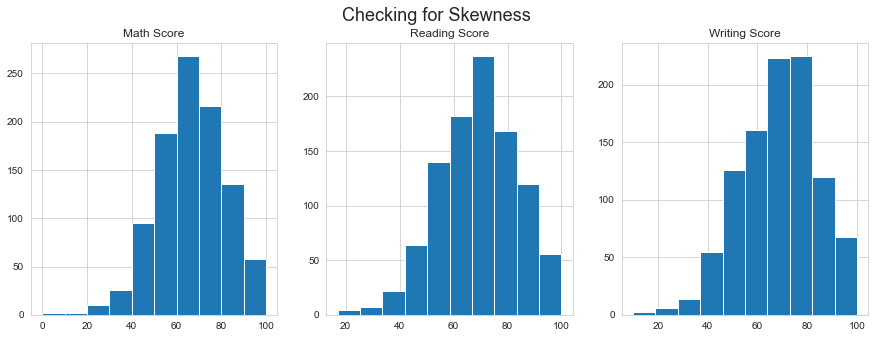

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(x = data["math score"])
plt.title("Math Score")

plt.subplot(1,3,2)
plt.hist(x = data["reading score"])
plt.title("Reading Score")

plt.subplot(1,3,3)
plt.hist(x = data["writing score"])
plt.title("Writing Score")

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

## Multivariate Analysis:
    
### We will start from visualizing passing rate of students based on gender.

In [11]:
myTuple = ('math score', 'reading score', 'writing score');
gender_scores = data[["math score", "reading score", "writing score" ]].groupby(data["gender"]).mean()
print(gender_scores)

        math score  reading score  writing score
gender                                          
female       63.63          72.61          72.47
male         68.73          65.47          63.31


In [12]:
data["average_score"] = (data["math score"]+data["reading score"]+data["writing score"])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


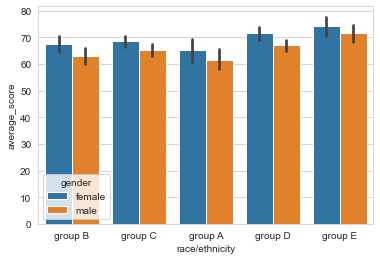

In [13]:
sns.barplot(x="race/ethnicity", y="average_score", hue="gender", data=data)

#### The best performing students belong to group E.
#### Children of Parents with higher degree performed better in the exam.

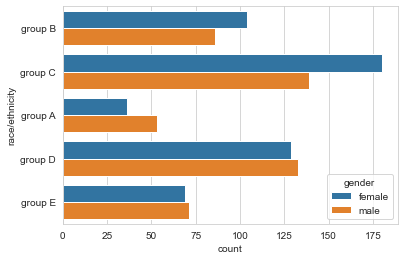

In [14]:
>>> ax = sns.countplot(y="race/ethnicity", hue="gender", data=data)

### Creating a variable for average score

In [15]:
def waec_grade(scores):
    
    if scores >= 85 and scores <= 100:
        return 'A1'
    if scores >= 70 and scores <= 85:
        return 'B2'
    if scores >= 65 and scores <= 70:
        return 'B3'
    if scores >= 60 and scores <= 65:
        return 'C4'
    if scores >= 55 and scores <= 60:
        return 'C5'
    if scores >= 50 and scores <= 55:
        return 'C6'
    if scores >= 45 and scores <= 50:
        return 'D7'
    if scores >= 40 and scores <= 45:
        return 'E8'
    elif scores < 40: 
        return 'F'

In [16]:
def waec_grade(scores):
    for key, letter in grade.items():
        if scores >= input:
            return grades

### Average Score Categorization

In [17]:
data['average_score_cat'] = data['average_score']
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,average_score_cat
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,49.33
4,male,group C,some college,standard,none,76,78,75,76.33,76.33


#### Create another variable “average_score_cat” that categorises the “average_score” using WAEC grading system.

In [18]:
data.corr()

,math score,reading score,writing score,average_score,average_score_cat
math score,1.00,0.82,0.80,0.92,0.92
reading score,0.82,1.00,0.95,0.97,0.97
writing score,0.80,0.95,1.00,0.97,0.97
average_score,0.92,0.97,0.97,1.00,1.00
average_score_cat,0.92,0.97,0.97,1.00,1.00


### Parental Level Of Education Relationship With Exam Performance CountPlot

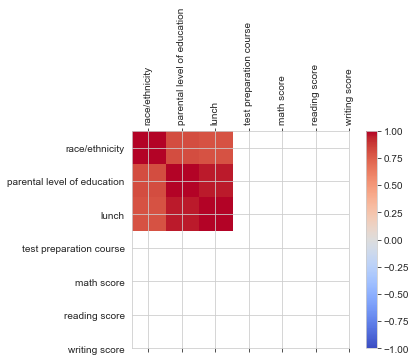

In [19]:
# Parental_level_of_Education Countplot

data = pd.read_csv('studentsperformance.csv', index_col=0)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

### Correlation Coeeficient

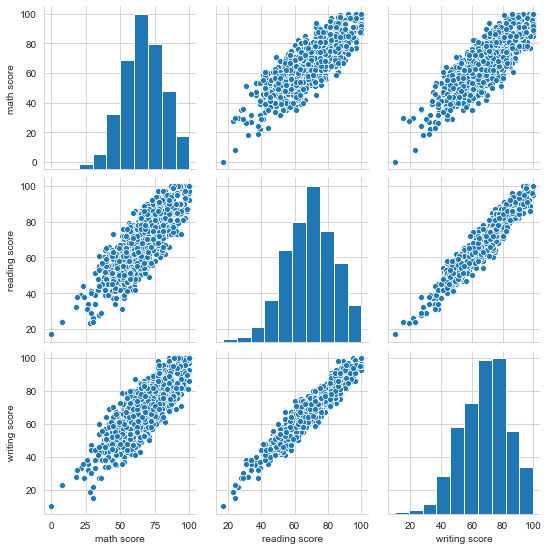

In [20]:
df = data[['math score','reading score','writing score']]

sns.pairplot(df, kind="scatter")
plt.show()

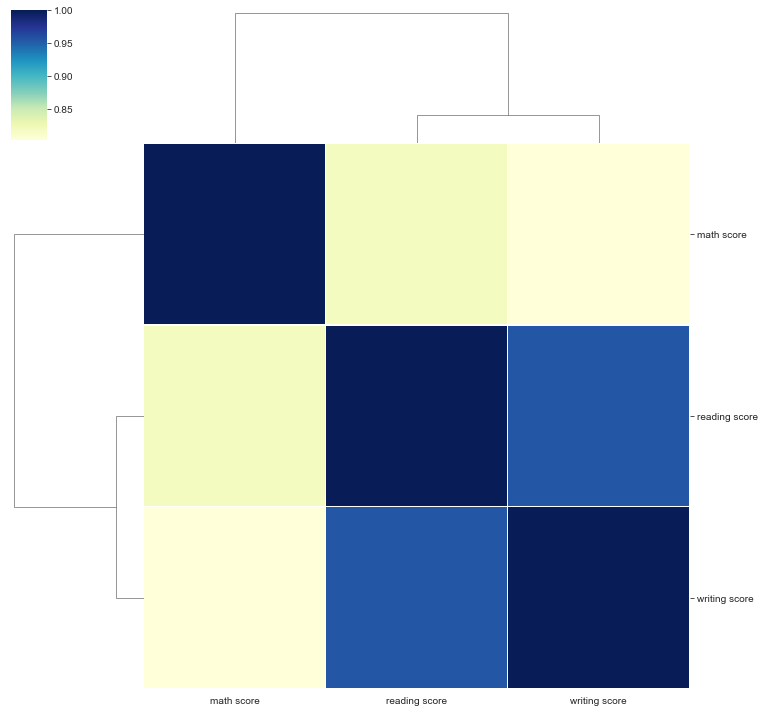

In [21]:
corrmat = data.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

## Conclusion

Most of the top scorers in maths belong to group E.

Students from group C, D and E have scored better in Reading than other groups.

Students from group D and E have performed better than other groups in Writing.

Students from group A are the worst performers in all subjects.

Group C, D and E students have best average score.

Among all the students we saw that no. of student with performance "good" is very high.

Female students performed better than Male students

Male Students are good in math and Femail students are better in Reading and Writing.

Reading score and Writing score are positively linearly correlated with correlation coefficient 0.95(approx.).

Preparation Test plays a significant role in students performance.

We saw that the students who had completed their test preparation course failed less in number and getting better scores in all subject.

Students who takes standard lunch performed very well than others.

Parents education level has positive impact on Students performance in the exam.

Students from group E are best performers and Students from group A are the worst performers in all subjects.

Peformance of students also depends on the type of lunch they take i.e. standard lunch helps in better performance.